## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). <b>Вам нужно выявить определяющие успешность игры закономерности.</b>
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Информация о данных

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('/Users/alena/Desktop/projects/Games/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Просмотрим информацию о данных:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

### Регистр

Приведем названия столбцов к нижнему регистру:

In [7]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Тип данных

Преобразуем типы данных:
- year_of_release - тип Int,тк это год
- user_score - float, сейчас object

Мы не будет переводить столбцы с продажами (na_sales, eu_sales, jp_sales, other_sales) - в тип int, так как это значения выручки, которые при округлении станут неточными.

In [8]:
df['year_of_release'] = df['year_of_release'].astype('float')

В столбце user_score есть значение tbd - To Be Determined. Те рейтинг еще не определен.

В таком случае оценивать игру будем по другим показателям. Значит, зрительский рейтинг можем заменить на 0.

In [9]:
df.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [10]:
df['user_score'] = df['user_score'].replace('tbd', '0').astype('float')

### Пропуски

Посмотрим пропуски в столбцах:

In [11]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
df[df['critic_score'].isnull()].sort_values(by = 'year_of_release', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
10819,Lego Star Wars: The Force Awakens,PSV,2016.0,Action,0.01,0.06,0.01,0.02,NaN,7.1,E10+
15364,Atari Flashback Classics: Volume 1,XOne,2016.0,Misc,0.02,0.00,0.00,0.00,NaN,0.0,E
15371,Resident Evil Zero,PC,2016.0,Action,0.01,0.01,0.00,0.00,NaN,NaN,NaN
11294,Toukiden 2,PS4,2016.0,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN
15383,Paragon,PS4,2016.0,Action,0.02,0.00,0.00,0.00,NaN,6.1,NaN
15401,Atari Flashback Classics: Volume 2,XOne,2016.0,Misc,0.02,0.00,0.00,0.00,NaN,0.0,E
15403,Hakuoki: Shinkai - Hana no Shou,PSV,2016.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11255,SD Gundam G Generation Genesis,PSV,2016.0,Strategy,0.00,0.00,0.09,0.00,NaN,NaN,NaN
11243,Assassin's Creed Chronicles,PS4,2016.0,Action,0.01,0.05,0.01,0.01,NaN,6.1,T


In [13]:
df[df['year_of_release'].isnull()].sort_values(by = 'na_sales', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,0.0,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T


In [14]:
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)
df['rating'] = df['rating'].fillna(0)

Cтроки с пропусками в столбцах genre и name удалим - их всего 2 + по строкам почти нет данных

Пропуски в столбце year_of_release пока оставим.

In [15]:
df.dropna(subset=['name'], inplace=True) 

In [16]:
df.isnull().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

### Суммарные продажи

Посчитаем суммарные продажи и добавим их в новый столбец

In [17]:
df['total_sales'] = df[['na_sales']+['eu_sales']+['jp_sales']+['other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38


### Вывод: предобработка данных

1) Заменили названия столбцов

2) Преобразовали типы данных

3) Обработали пропуски:
- столбцы name и genre - удалили, тк их мало
- столбцы с рейтингом - заменили на 0. Пропуск означает, что рейтинг не сформирован. Либо это очень старые игры, либо непопулярные, либо недавно вышедшие (рейтинга еще нет)
- столбец year_of_release - пока оставили, тк есть другие данные

4) Посчитали суммарные продажи и добавили их в новый столбец

## Исследовательский анализ данных

In [18]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38


### Выпуск игр в разные годы
Посмотрим, сколько игр выпускалось в разные годы:

Text(0, 0.5, 'Количество игр')

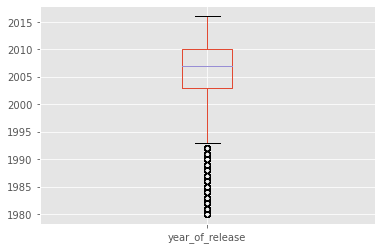

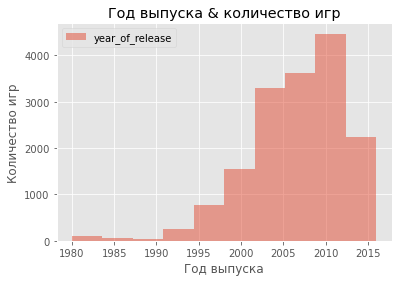

In [19]:
#Строим диаграмму размаха
plt.style.use('ggplot')

df.boxplot('year_of_release')

df.plot.hist( y = 'year_of_release', bins = 10, grid = True, alpha = 0.5)

plt.title('Год выпуска & количество игр')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

Игры, вышедшие ранее 1995 года можем признать выбросами и удалить. 
Индустрия игр еще не была так развита, поэтому их было очень мало.

In [20]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int')

df = df.query('year_of_release >= 1996')

### Изменение продаж по платформам

Посмотрим, как менялись продажи по платформам. 

In [21]:
df['platform'].unique()

array(['Wii', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS',
       'N64', 'PS', 'XB', 'PC', 'PSP', 'XOne', 'WiiU', 'GC', 'SNES', 'DC',
       'PSV', 'SAT', 'WS', 'NG', 'PCFX'], dtype=object)

Выберем платформы с наибольшими суммарными продажами

In [22]:
df_platform = df.pivot_table(index = ['platform'],
                                     values = 'total_sales',
                                     aggfunc='sum').sort_values(
                                     by = 'total_sales', ascending = False)

df_platform = df_platform.query('total_sales > 100')
df_platform.head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76


In [23]:
#Отфильтруем по вхождению в df_platform.index

df_platform_sales = df.query('platform in @df_platform.index').pivot_table(
    index = ['year_of_release', 'platform'],
    values = 'total_sales',
    aggfunc='sum').sort_values(by = 'total_sales', ascending = False).reset_index()

df_platform_sales


,year_of_release,platform,total_sales
0,2004,PS2,211.81
1,2009,Wii,206.97
2,2002,PS2,205.38
3,2003,PS2,184.31
4,2008,Wii,171.32
...,...,...,...
143,2008,XB,0.18
144,2016,Wii,0.18
145,2015,PSP,0.12
146,2002,N64,0.08


Text(0, 0.5, 'Продажи')

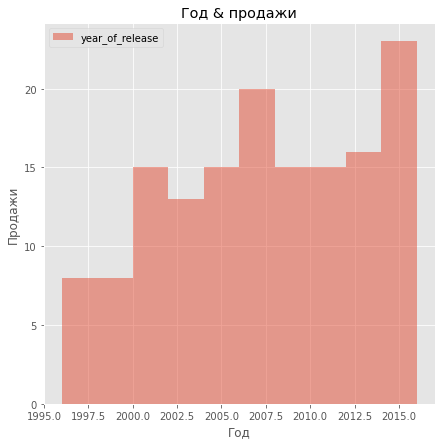

In [24]:
df_platform_sales.plot.hist(x = 'total_sales', y = 'year_of_release',
                            alpha=0.5,
                            legend=True, bins=10, figsize=(7,7))

plt.title('Год & продажи')
plt.xlabel('Год')
plt.ylabel('Продажи')

С годами увеличивается общая выручка игр. Это связано с развитием и популяризацией интернета.

За 5-7 лет появляются новые и исчезаюи старые платформы.

In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


In [26]:
def lifetime(row):

    for name in df['platform'].unique():
        time = ['year_of_release'].max() - ['year_of_release'].min()
    return time
    
df['platform_lifetime'] = df.apply(lifetime, axis = 1) 


AttributeError: 'list' object has no attribute 'max'

### Лидеры по продажам

Возьмем период: 2004 - 2015 год, тк в эти годы выпускалось больше всего игр.
Также период позволить увидеть динамику.

Опеределим лидеров по продажам

In [27]:
df_actual = df.query('2015 >= year_of_release >= 2004')

df_lider = df_actual.pivot_table(index = ['platform',
                                        'year_of_release'],
                                        values='total_sales',
                                        aggfunc='sum').reset_index()

df_lider.head()

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78


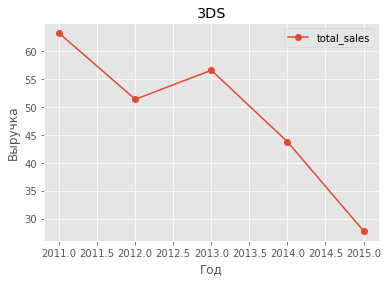

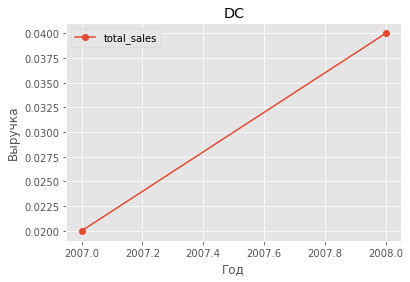

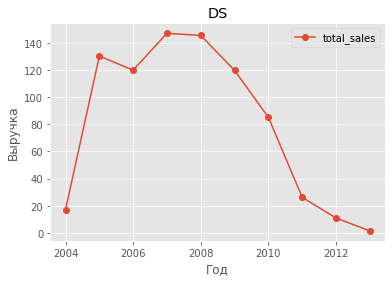

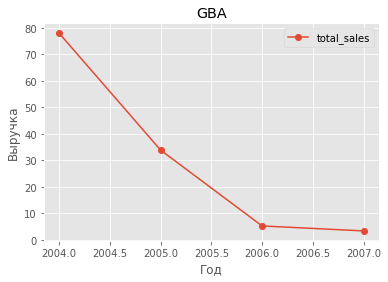

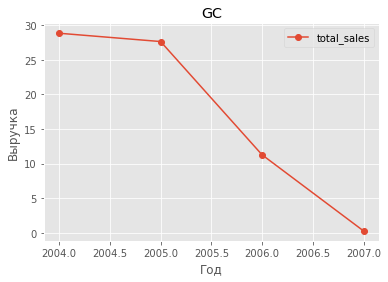

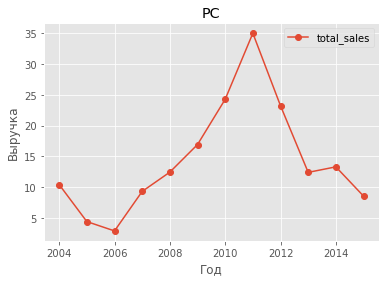

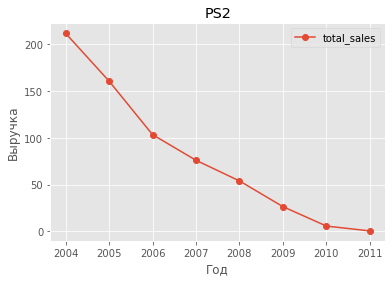

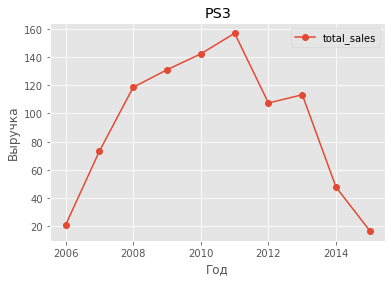

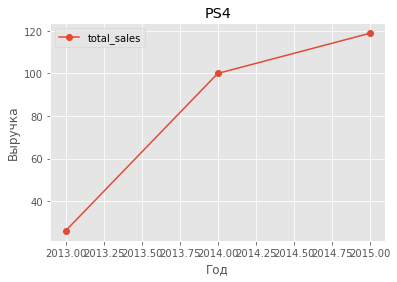

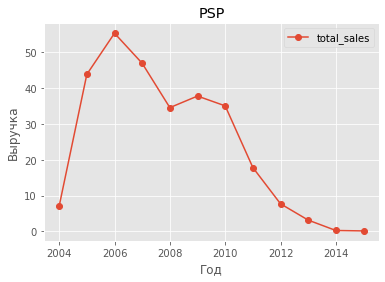

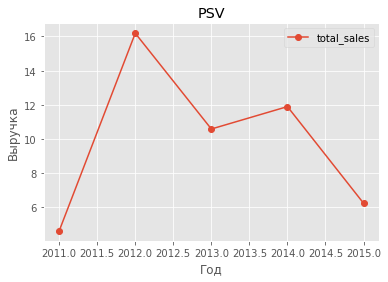

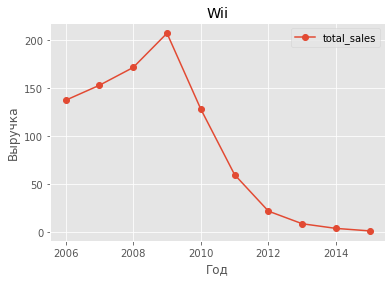

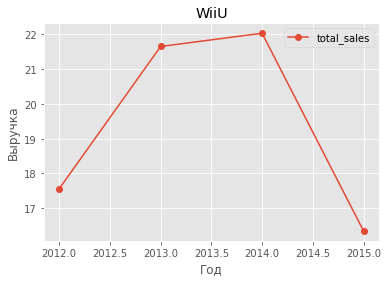

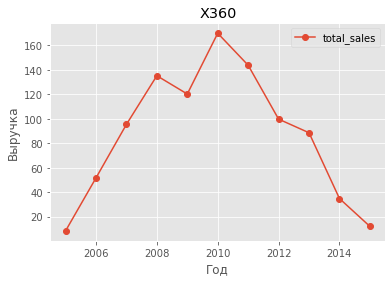

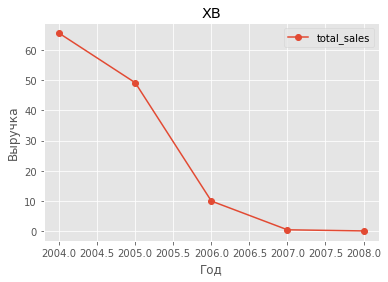

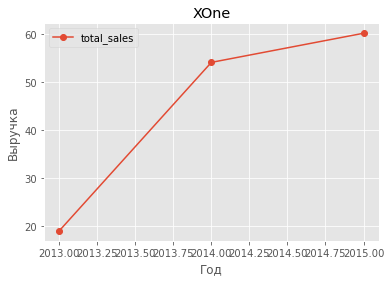

In [28]:
for platform in df_lider['platform'].unique():
    
    df_lider.query('platform == @platform').plot(
    x = 'year_of_release', y = 'total_sales', style='o-')
    
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Выручка')
    plt.show()
        
        

Посмотрим распределение выручки за выбранный период по платформам:

Text(0.5, 1.0, 'Распределение продаж по платформам')

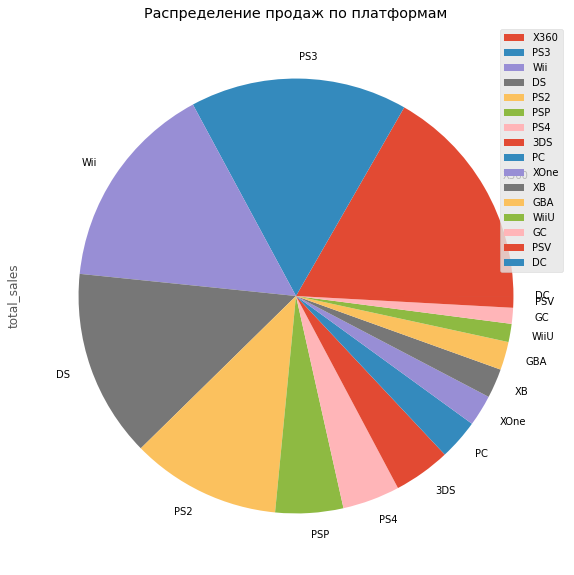

In [29]:
df_top_sales = df_actual.pivot_table(index = ['platform'],
                                                    values='total_sales',
                                                    aggfunc='sum').sort_values(
                                                    by = 'total_sales', ascending = False)

df_top_sales.plot(y='total_sales', kind='pie', figsize = (10,10))

plt.title('Распределение продаж по платформам')

In [30]:
df_sum = df_top_sales['total_sales'].sum()

df_top_sales['percentage'] = df_top_sales['total_sales']/df_sum*100
df_top_sales.head()

,total_sales,percentage
platform,,
X360,959.72,16.709439
PS3,927.74,16.152643
Wii,891.00,15.512973
DS,802.76,13.976649
PS2,638.27,11.112755


Платформы, которые показывают рост выручки на протяжении периода:
- DC
- PS4
- XOne.

Платформы, показатели выручки которых падают:
3DS, DS, GBA, GC, PC, PS2, PS3, PSP, PSV, Wii, WiiU, X360, XB

Многие платформы со снижающимися показателями выручки занимают большую долю в общей выручке.
Связано с тем, что у каждой был пик популярности с максимальными сборами. 
Плюс старые версии заменяются новыми.

<b>К потенциально прибыльным платформам отнесем: DC, PS4, XOne </b>

### Распределения: глобальные продажи, продажи по платформам

Построим диаграмму размаха для двух типов данных, опишем распределения

<AxesSubplot:>

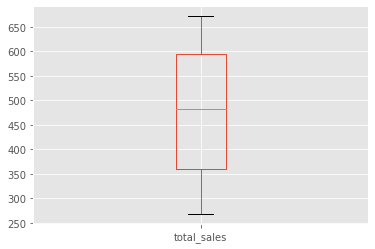

In [31]:
df_actual.pivot_table(index = 'year_of_release',
               values = 'total_sales',
               aggfunc='sum').sort_values(
               by = 'total_sales', ascending = False).boxplot()

- В данных отсуствуют выбросы. 
- Медианное значение продаж - 350 млн.
- Распределение близко к нормальному.

<AxesSubplot:>

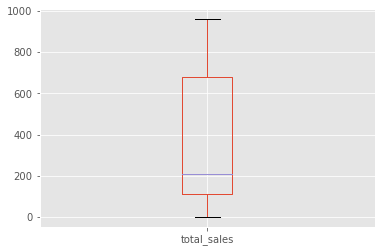

In [32]:
df_actual.pivot_table(index = ['platform'],
                values = 'total_sales',
                aggfunc='sum').sort_values(
                by = 'total_sales', ascending = False).boxplot()


- Нет выбросов
- Медиана равна 210 млн. 
- Распределение скошено, небольшое количество игр с большим кол-вом продаж.

### Корреляция: отзывы и продажи

Рассмотрим корреляцию на пример платформы X360

In [33]:
df_X360 = df_actual.query('platform == "X360"').pivot_table(index =['year_of_release'],
                                                    values = ['critic_score', 'user_score', 'total_sales'],
                                                    aggfunc='sum').reset_index()
df_X360.head()

,year_of_release,critic_score,total_sales,user_score
0,2005,1227.0,8.25,117.7
1,2006,5308.0,51.62,530.8
2,2007,7603.0,95.41,731.1
3,2008,8604.0,135.26,859.6
4,2009,9056.0,120.29,893.1


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

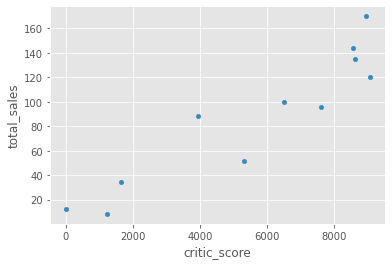

In [34]:
df_X360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=1) 

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

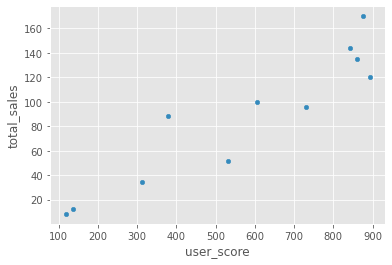

In [35]:
df_X360.plot(x='user_score', y='total_sales', kind='scatter', alpha=1) 

In [36]:
print('Корелляция оценка критика - продажи:',(df_X360['critic_score'].corr(df_X360['total_sales'])))

print('Корелляция оценка пользователя - продажи:',(df_X360['user_score'].corr(df_X360['total_sales'])))


Корелляция оценка критика - продажи: 0.9296516644770519
Корелляция оценка пользователя - продажи: 0.9297371953848688


<b>Корреляция в обоих случаях близка к единице, что говорит о наличии сильной связи - оценка критиков и пользователей влияет на продажи.</b>

### Корреляция: все платформы

Посмотрим, справедливы ли выводы для других платформ.

Корелляция оценка критика - продажи: 0.8450356437781347
Корелляция оценка пользователя - продажи: 0.8291265376334109


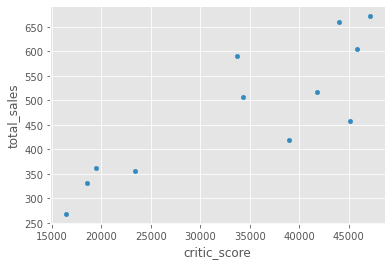

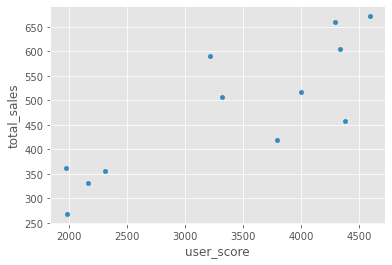

In [37]:
df_corr = df_actual.pivot_table(index =['year_of_release'],
                       values = ['critic_score', 'user_score', 'total_sales'],
                       aggfunc='sum').reset_index()

df_corr.plot(x='critic_score', y='total_sales', kind='scatter', alpha=1) 
df_corr.plot(x='user_score', y='total_sales', kind='scatter', alpha=1) 

print('Корелляция оценка критика - продажи:',(df_corr['critic_score'].corr(df_corr['total_sales'])))

print('Корелляция оценка пользователя - продажи:',(df_corr['user_score'].corr(df_corr['total_sales'])))


<b>Корелляция у всех платформ в совокупности чуть ниже, но все же взаимосвязь сохраняется.</b>

### Распределение по жанрам

Посмотрим общее распределение игр по жанрам.

- Выделим прибыльные жанры
- Определим, выделяются ли жанры с высокими и низкими продажами


Жанры с высокими продажами:

In [38]:
pivot_genres = df_actual.pivot_table(index = ['genre'], 
               values = ['total_sales'],
               aggfunc = 'sum').sort_values(by ='total_sales', ascending = False)
pivot_genres.head(5)

,total_sales
genre,
Action,1248.06
Sports,893.46
Shooter,767.28
Misc,644.39
Role-Playing,586.56


Жанры с низкими продажами:

In [39]:
df_actual.pivot_table(index = ['genre'], 
               values = ['total_sales'],
               aggfunc = 'sum').sort_values(by ='total_sales').head(5)

,total_sales
genre,
Strategy,84.43
Puzzle,118.67
Adventure,154.61
Fighting,220.36
Simulation,278.60


Общее распределение:

Text(0.5, 1.0, 'Распределение продаж по жанрам')

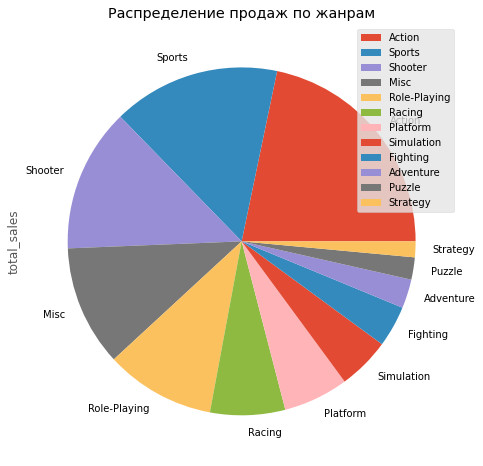

In [40]:
pivot_genres.plot(y='total_sales', kind = 'pie',figsize = (8,8))

plt.title('Распределение продаж по жанрам')

<b>Наиболее популярные жанры: </b>
Action, Sports, Shooter, Misc, Role-Playing
    
<b>Наименее популярные жанры:</b> Puzzle, Strategy, Adventure, Simulation ,Fighting

## Портрет пользователя

Определим для пользователя каждого региона:

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Европа - Портрет пользователя 

Самые популярные платформы:

In [41]:
eu_platform = df_actual.pivot_table(index = ['platform'],
               values = ['eu_sales'],
               aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False)

ey_sales_total = df_actual['eu_sales'].sum()
eu_platform['percentage'] = eu_platform['eu_sales']/ey_sales_total

eu_platform.head()


,eu_sales,percentage
platform,,
PS3,325.95,0.194810
X360,267.61,0.159942
Wii,258.21,0.154324
DS,188.41,0.112607
PS2,143.15,0.085556


Самые популярные жанры:

In [42]:
eu_genre = df_actual[['genre', 'eu_sales']]
eu_genre.pivot_table(index = ['genre'],
                    values = ['eu_sales'],
                    aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False).head()

,eu_sales
genre,
Action,377.92
Sports,268.46
Shooter,244.93
Misc,175.87
Racing,139.74


Влияние рейтинга:

In [43]:
eu_rating = df_actual.pivot_table(index = ['rating'],
               values = ['eu_sales'],
               aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False).reset_index()


eu_rating

,rating,eu_sales
0,E,536.20
1,M,412.05
2,T,281.44
3,0,263.31
4,E10+,179.42
5,AO,0.61
6,EC,0.11
7,RP,0.03


<b> Для Европы характерны: </b>

<b> Самые популярные платформы </b>
- PS3	
- X360	
- Wii	
- DS	
- PS2

<b> Самые популярные жанры </b>
- Action
- Sports
- Shooter	
- Racing
- Misc

<b> Рейтинг влияет на поведение пользователей. </b>

Так, можно заметить лидеров: игры с рейтингом Е (everyone), M(mature) и T(teens).
Влияние можно объяснить так: рейтинг дает возможность пользователю сориентироваться при выборе игры.
    


### Северная Америка - Портрет пользователя  

Самые популярные платформы:

In [44]:
na_platform = df_actual.pivot_table(index = ['platform'],
               values = ['na_sales'],
               aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False)

na_sales_total = df_actual['na_sales'].sum()
na_platform['percentage'] = na_platform['na_sales']/na_sales_total

na_platform.head()

,na_sales,percentage
platform,,
X360,595.05,0.212033
Wii,486.81,0.173464
PS3,389.46,0.138776
DS,380.31,0.135515
PS2,297.27,0.105926


Самые популярные жанры:

In [45]:
na_genre = df_actual[['genre', 'na_sales']]
na_genre.pivot_table(index = ['genre'],
                    values = ['na_sales'],
                    aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False).head()

,na_sales
genre,
Action,609.83
Sports,463.68
Shooter,415.06
Misc,328.21
Role-Playing,227.52


Влияние рейтинга:

In [46]:
na_rating = df_actual.pivot_table(index = ['rating'],
               values = ['na_sales'],
               aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False).reset_index()


na_rating

,rating,na_sales
0,E,962.80
1,M,633.67
2,T,518.85
3,0,346.86
4,E10+,341.43
5,EC,1.53
6,AO,1.26
7,RP,0.00


<b> Для Северной Америки характерны </b>

<b> Самые популярные платформы </b>
- X360
- Wii 
- PS3
- DS
- PS2


<b> Самые популярные жанры </b>
- Action
- Sports
- Shooter
- Misc
- Role-Playing

<b> Влияние рейтинга на поведение пользователей. </b>

Рейтинг влияет на поведение пользователя.

### Япония - Портрет пользователя 

In [47]:
jp_platform = df_actual.pivot_table(index = ['platform'],
               values = ['jp_sales'],
               aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False)

jp_sales_total = df_actual['jp_sales'].sum()
jp_platform['percentage'] = jp_platform['jp_sales']/jp_sales_total

jp_platform.head()

,jp_sales,percentage
platform,,
DS,175.00,0.274329
3DS,92.59,0.145144
PS3,78.11,0.122445
PSP,75.88,0.118949
PS2,70.15,0.109967


In [48]:
jp_genre = df_actual[['genre', 'jp_sales']]
jp_genre.pivot_table(index = ['genre'],
                    values = ['jp_sales'],
                    aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,186.48
Action,106.14
Misc,73.88
Sports,56.01
Platform,42.32


In [49]:
jp_rating = df_actual.pivot_table(index = ['rating'],
               values = ['jp_sales'],
               aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False).reset_index()


jp_rating

,rating,jp_sales
0,0,295.78
1,E,158.20
2,T,97.01
3,M,47.35
4,E10+,39.58
5,AO,0.00
6,EC,0.00
7,RP,0.00


<b> Для Японии характерны </b>

<b> Самые популярные платформы </b>
- DS
- 3DS	
- PS3	
- PSP	
- PS2

<b> Самые популярные жанры </b>
- Role-Playing
- Action
- Misc
- Sports
- Platform

<b> Влияние рейтинга на поведение пользователей. </b>

Рейтинг в меньшей степени влияет на поведение пользователей.

### Вывод

<b>Пятерку лидеров составляют платформы</b>
- В Европе: PS3 (19%), X360 (16%), Wii (15%), DS (11%), PS2 (8%)
- В Северной Америке: X360 (21%), Wii (17%), PS3 (13,8%), DS (13,5%), PS2 (11%)
- В Японии: DS (27%), 3DS (15%), PS3 (12%), PSP (11,8%), PS2(11%)

Абсолютные лидеры в Европе и Северной Америке: PS3, X360, Wii.
В Японии немного иная структура спроса. В топе у пользователей: DS, 3DS, PS3.

<b>Топ-5 жанров</b>
- В Европе: Action, Sports, Shooter, Racing, Misc
- В Северной Америке: Action, Sports, Shooter, Misc, Role-Playing
- В Японии: Role-Playing, Action, Misc, Sports, Platform

В качестве абсолютных лидеров можно выделить жанры: Action, Sports, Misc

<b> Рейтинг от организации ESRB </b>

Рейтинг влияет на поведение пользователей в Европе и Северной Америке. 

В Японии влияние намного меньше.
Возрастными рейтингами для игр в Японии занимается локальная организация - CERO.

## Проверка гипотез

Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему

### Гипотеза №1

<b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b>

Нулевая гипотеза всегда формулируется так, чтобы использовать знако равенства.
Исходя из нулевой гипотезы формулируется альтернативная.

$\begin{equation*}
 \begin{cases}
H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC одинаковые}\\
H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC отличаются}
 \end{cases}
\end{equation*}$

Проверим нормальность распределения:

/Users/alena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


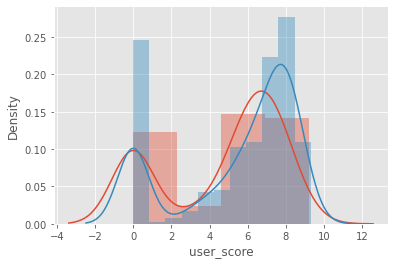

In [50]:
sns.distplot(df_actual.query('platform == "XOne"')['user_score']);
sns.distplot(df_actual.query('platform == "PC"')['user_score']);

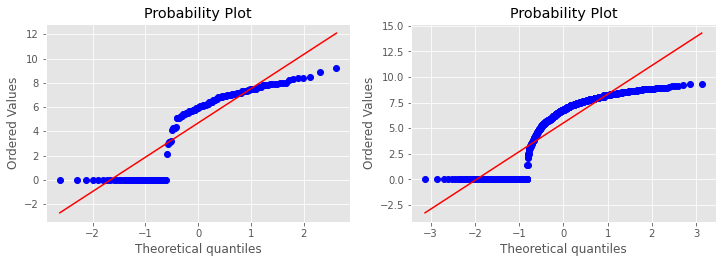

In [51]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df_actual.query('platform == "XOne"')['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(df_actual.query('platform == "PC"')['user_score'], dist="norm", plot=plt)
plt.show()

Распределение нельзя назвать нормальным, поэтому будем проверять гипотезу с помощью непараметрического теста Манна-Уитни.

Уровень значимости:  𝛼=0.05 

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости  𝛼=0.05 , то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [52]:
alpha = .05

results = st.mannwhitneyu(
    (df_actual.query('platform == "XOne" & user_score!= -777')['user_score']),
    (df_actual.query('platform == "PC" & user_score!= -777')['user_score']),
    alternative='two-sided')
     
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  9.797737313328692e-06
Отвергаем нулевую гипотезу


In [53]:
df_actual.query('platform == "XOne" & user_score!= -777')['user_score'].mean()

4.69625

In [54]:
df_actual.query('platform == "PC" & user_score!= -777')['user_score'].mean()

5.516983523447408

<b> Пользовательские рейтинги платформ Xbox One и PC различаются </b>

### Гипотеза №2

Средние пользовательские рейтинги жанров Action и Sports разные.

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action и Sports одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Action и Sports разные}
 \end{cases}
\end{equation*}$

Проверим данные на нормальность (построим qq-plot для нормального распределения):

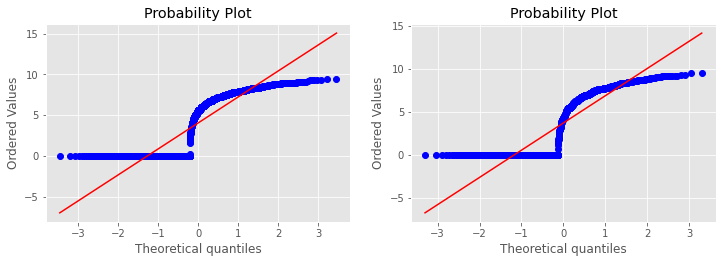

In [55]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df_actual.query('genre == "Action"')['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(df_actual.query('genre == "Sports"')['user_score'], dist="norm", plot=plt)
plt.show()

Проводим непараметрический тест Манна-Уитни.

Проверка гипотез двусторонняя.

In [56]:
results = st.mannwhitneyu(
    (df_actual.query('genre == "Action"')['user_score']),
    (df_actual.query('genre == "Sports"')['user_score']),
    alternative='two-sided')

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0020393192403408266
Отвергаем нулевую гипотезу


## Вывод 

Основные факторы, определяющие успешность игры:

- Отзывы критиков и других пользователей влияют на продажи
- Наиболее популярные платформы в Европе и Северной Америке: PS3, X360, Wii.
В Японии: DS, 3DS, PS3
- Лидирующие жанры: Action, Sports, Misc
- Жанры с низкими продажами: Strategy, Puzzle, Adventure, Fighting, Simulation
- Рейтинг от организации ESRB влияет на поведение пользователей в Европе и Северной Америке. В Японии влияния почти нет, так как возрастными рейтингами для игр занимается локальная организация - CERO.
- Платформы, которые могут оказаться перспективными (показали рост выручки на протяжении 2004-2015): DC, PS4, XOne